## Exemplo de uma MLP para classificação de guaxinins
#### Author: Ithallo J. A. Guimarães    Aug/2016

In [10]:
from sklearn.neural_network import MLPClassifier
from scipy import misc
import numpy as np
import random as rd
import matplotlib.pyplot as plt

## Carregando imagens

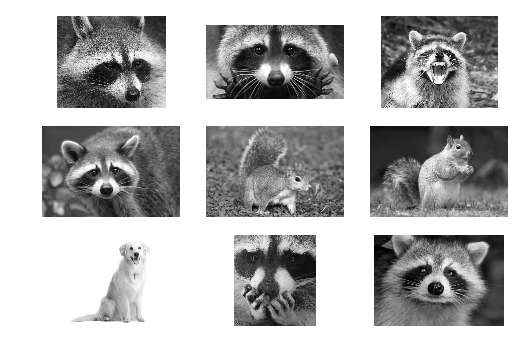

In [14]:
g1 = misc.imread('./set/r1.png')
g2 = misc.imread('./set/r2.png')
g3 = misc.imread('./set/r3.png')
g4 = misc.imread('./set/r4.png')
e1 = misc.imread('./set/not1.png')
e2 = misc.imread('./set/not2.png')
c1 = misc.imread('./set/dog.png')
g5 = misc.imread('./set/r5.png')
g6 = misc.imread('./set/r6.png')
imagens = [np.array(g1[:,:,0]), np.array(g2[:,:,0]), np.array(g3[:,:,0]),
              np.array(g4[:,:,0]), np.array(e1[:,:,0]), np.array(e2[:,:,0]),
              np.array(c1[:,:,0]), np.array(g5[:,:,0]), np.array(g6[:,:,0])]
%matplotlib inline
n = 331
for i in imagens:
    plt.subplot(n)
    plt.imshow(i, cmap=plt.cm.gray)
    plt.axis('off')
    n=n+1
plt.show()

## As características são cada um dos pixels das imagens redimensionadas (150x150 pixels, total de 22500 características)

### Função para redimensionar as figuras

In [4]:
def redimensiona_imagem(photo, r=150, c=150):
    new = []
    otp = []
    rows = np.linspace(0,photo.shape[0],r).astype(int)
    columns = np.linspace(0,photo.shape[1], c).astype(int)
    for  i in rows-1:
        for j in columns-1:
            new.append(photo[i,j])
        otp.append([new]) 
        new = []
    return np.hstack(otp) 

### Criando a matrix de características

In [5]:
caracteristicas = []
for i in imagens:
    caracteristicas.append(redimensiona_imagem(i))
caracteristicas = np.vstack(caracteristicas)
print caracteristicas.shape

(9L, 22500L)


### Rótulos 1 para é guaxinim e 0 para não é guaxinim

In [6]:
rotulos = [1., 1., 1., 1., 0., 0., 0., 1., 1.]

## Treinando a Rede Neural

In [8]:
import time
start_time = time.time()

clf = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(500,300,), random_state=1,
                verbose=False, max_iter=10000, shuffle= False)
clf.fit(caracteristicas, rotulos)

print("--- %s Segundos ---" % (time.time() - start_time))

--- 394.671000004 Segundos ---


## Verificando os Resultados

In [18]:
results = clf.predict(caracteristicas)
for i in results:
    if i== 1:
        print (i, "E um Quaxinim!")
    else:
        print (i, "Nao e um Guaxinim!")
print"Acurácia:", clf.score(caracteristicas, rotulos) 

(1.0, 'E um Quaxinim!')
(1.0, 'E um Quaxinim!')
(1.0, 'E um Quaxinim!')
(1.0, 'E um Quaxinim!')
(0.0, 'Nao e um Guaxinim!')
(0.0, 'Nao e um Guaxinim!')
(0.0, 'Nao e um Guaxinim!')
(1.0, 'E um Quaxinim!')
(1.0, 'E um Quaxinim!')
Acurácia: 1.0


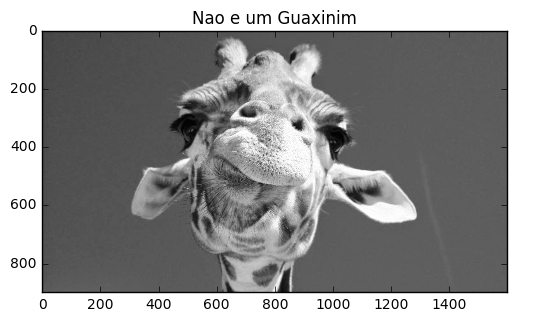

In [20]:
plt.imshow(misc.imread('./set/giraffe.png')[:,:,0], cmap=plt.cm.gray)    
if clf.predict(redimensiona_imagem(misc.imread('./set/giraffe.png')[:,:,0]))== 1: plt.title("E um Quaxinim")
else: plt.title("Nao e um Guaxinim")

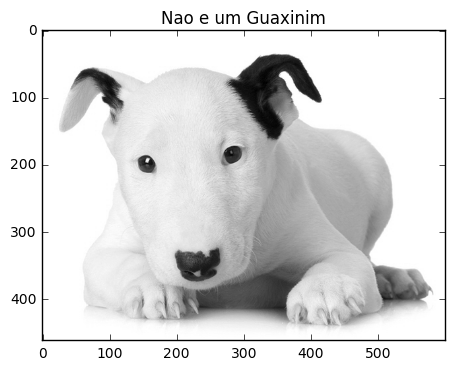

In [21]:
plt.imshow(misc.imread('./set/bt.png')[:,:,0], cmap=plt.cm.gray)
if clf.predict(redimensiona_imagem(misc.imread('./set/bt.png')[:,:,0]))== 1: plt.title("E um Quaxinim")
else: plt.title("Nao e um Guaxinim")
    

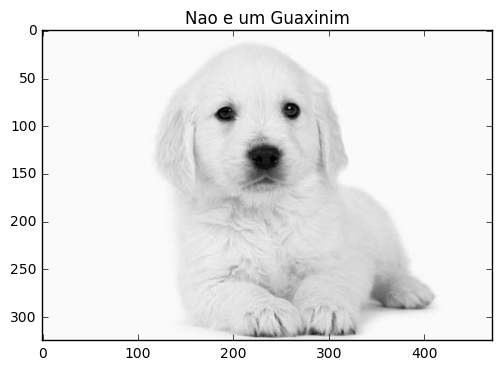

In [22]:
plt.imshow(misc.imread('./set/dog1.png')[:,:,0], cmap=plt.cm.gray)
if clf.predict(redimensiona_imagem(misc.imread('./set/dog1.png')[:,:,0]))== 1: plt.title("E um Quaxinim")
else: plt.title("Nao e um Guaxinim")

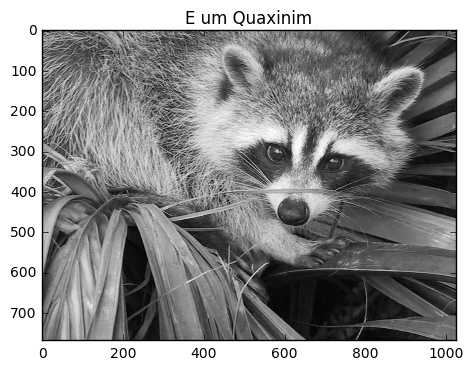

In [32]:

w1 =  misc.imread('./set/face.png')[:,:,0]
plt.imshow(w1, cmap=plt.cm.gray)
if clf.predict(redimensiona_imagem(w1))== 1: plt.title("E um Quaxinim")
else: plt.title("Nao e um Guaxinim")